In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

TEMPERATURE

In [2]:
df = pd.read_excel('Temperature.xlsx')

#pilih kolom yang dituju
manual = df['Temperature_2']
otomatis = df['Temperature_1']

In [3]:
from scipy.stats import ttest_ind

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel Temperature:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel Temperature:
Statistic = 3.695583803804904, p-value = 0.00022102447118748294
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


      Temperature_1  Temperature_2
0             25.58           25.8
1             27.10           26.9
2             28.90           28.6
3             26.50           26.2
4             28.90           28.5
...             ...            ...
3565          26.00           25.6
3566          25.56           25.6
3567          25.00           25.2
3568          24.70           25.0
3569          24.31           24.8

[3570 rows x 2 columns]


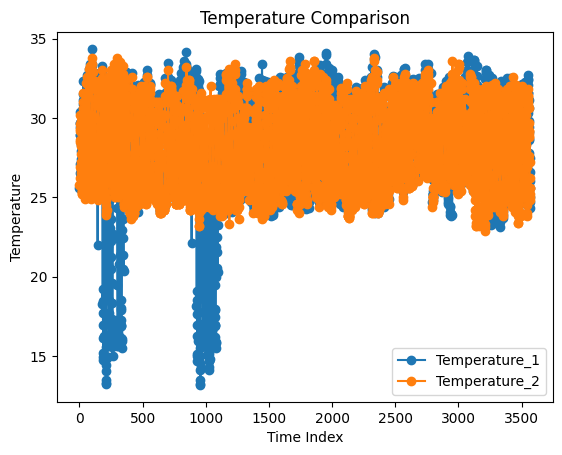

In [4]:
import matplotlib.pyplot as plt

# Membaca data dari file Excel
file_path = 'Temperature.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df['Temperature_1'], label='Temperature_1', marker='o')
plt.plot(df['Temperature_2'], label='Temperature_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

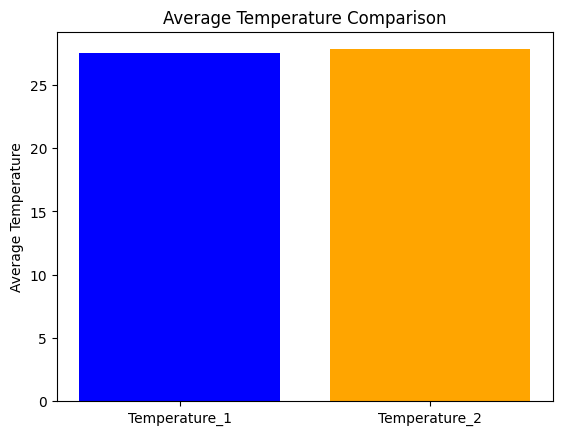

In [5]:
file_path = 'Temperature.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Temperature_1 dan Temperature_2
average_temperature_1 = df['Temperature_1'].mean()
average_temperature_2 = df['Temperature_2'].mean()

# Plotting
plt.bar(['Temperature_1', 'Temperature_2'], [average_temperature_1, average_temperature_2], color=['blue', 'orange'])
plt.ylabel('Average Temperature')
plt.title('Average Temperature Comparison')
plt.show()

In [6]:
df.describe()

,Temperature_1,Temperature_2
count,3570.000000,3570.000000
mean,27.548472,27.812661
std,3.421311,2.557172
min,13.170000,22.900000
25%,25.600000,25.500000
50%,27.500000,27.600000
75%,29.987500,30.000000
max,34.350000,33.800000


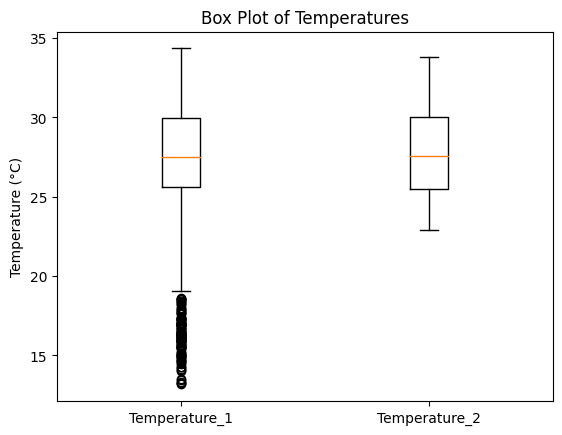

In [7]:
plt.boxplot([df['Temperature_1'], df['Temperature_2']], labels=['Temperature_1', 'Temperature_2'])
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of Temperatures')
plt.show()

In [8]:
file_path = 'Temperature.xlsx'
df = pd.read_excel(file_path)

# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers_temperature_1 = df[(df['Temperature_1'] < lower_bound['Temperature_1']) | (df['Temperature_1'] > upper_bound['Temperature_1'])]
outliers_temperature_2 = df[(df['Temperature_2'] < lower_bound['Temperature_2']) | (df['Temperature_2'] > upper_bound['Temperature_2'])]

# Menampilkan outlier
print("Outliers in Temperature_1:")
print(outliers_temperature_1)

print("\nOutliers in Temperature_2:")
print(outliers_temperature_2)

Outliers in Temperature_1:
      Temperature_1  Temperature_2
182           18.30           26.6
183           17.68           26.2
185           18.45           27.0
186           16.94           26.0
187           16.14           25.6
...             ...            ...
1075          16.89           24.8
1076          16.17           24.6
1077          15.89           24.6
1078          15.52           25.0
1079          15.80           25.0

[127 rows x 2 columns]

Outliers in Temperature_2:
Empty DataFrame
Columns: [Temperature_1, Temperature_2]
Index: []


In [9]:
import pandas as pd

# Load the data from the Excel file
file_path = 'Temperature.xlsx'
df = pd.read_excel(file_path)

# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers_temperature_1 = df[(df['Temperature_1'] < lower_bound['Temperature_1']) | (df['Temperature_1'] > upper_bound['Temperature_1'])]
outliers_temperature_2 = df[(df['Temperature_2'] < lower_bound['Temperature_2']) | (df['Temperature_2'] > upper_bound['Temperature_2'])]

# Menghapus nilai yang dianggap sebagai outlier
df_cleaned = df.drop(outliers_temperature_1.index.union(outliers_temperature_2.index))

# Menampilkan DataFrame tanpa outlier
print("DataFrame without outliers:")
print(df_cleaned)

DataFrame without outliers:
      Temperature_1  Temperature_2
0             25.58           25.8
1             27.10           26.9
2             28.90           28.6
3             26.50           26.2
4             28.90           28.5
...             ...            ...
3565          26.00           25.6
3566          25.56           25.6
3567          25.00           25.2
3568          24.70           25.0
3569          24.31           24.8

[3443 rows x 2 columns]


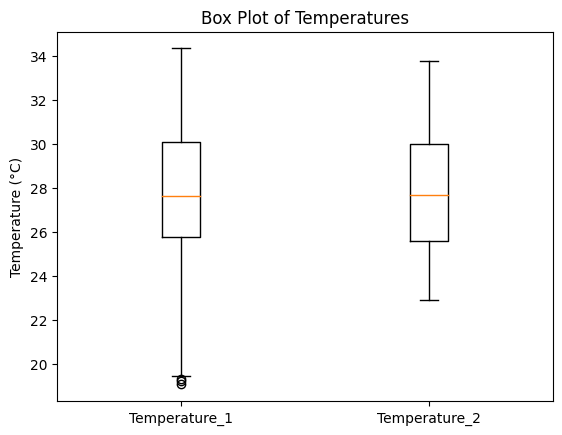

In [10]:
plt.boxplot([df_cleaned['Temperature_1'], df_cleaned['Temperature_2']], labels=['Temperature_1', 'Temperature_2'])
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of Temperatures')
plt.show()

In [11]:
#pilih kolom yang dituju
manual = df_cleaned['Temperature_2']
otomatis = df_cleaned['Temperature_1']

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel Temperature:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel Temperature:
Statistic = -0.9839759228632157, p-value = 0.3251619322084759
Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.


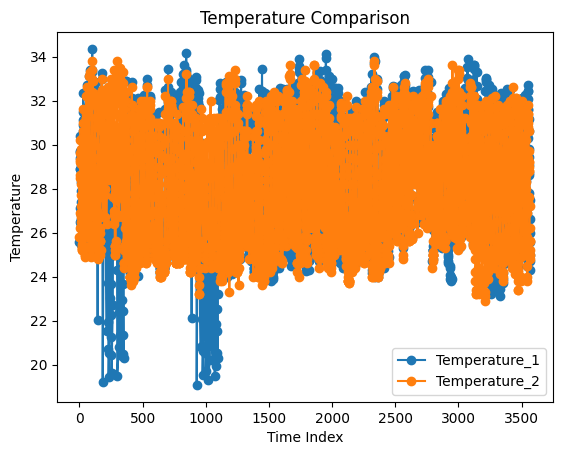

In [12]:
# Plotting
plt.plot(df_cleaned['Temperature_1'], label='Temperature_1', marker='o')
plt.plot(df_cleaned['Temperature_2'], label='Temperature_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

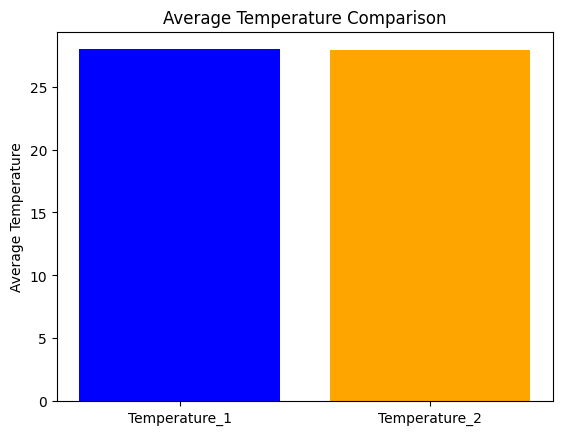

In [13]:
# Menghitung rata-rata nilai kolom Temperature_1 dan Temperature_2
average_temperature_1 = df_cleaned['Temperature_1'].mean()
average_temperature_2 = df_cleaned['Temperature_2'].mean()

# Plotting
plt.bar(['Temperature_1', 'Temperature_2'], [average_temperature_1, average_temperature_2], color=['blue', 'orange'])
plt.ylabel('Average Temperature')
plt.title('Average Temperature Comparison')
plt.show()

In [14]:
df_cleaned.describe()

,Temperature_1,Temperature_2
count,3443.000000,3443.000000
mean,27.965463,27.903369
std,2.680873,2.554195
min,19.080000,22.900000
25%,25.800000,25.600000
50%,27.640000,27.700000
75%,30.100000,30.000000
max,34.350000,33.800000


DEW POINT

In [15]:
df = pd.read_excel('Dew_Point.xlsx')

#pilih kolom yang dituju
manual = df['Dew_Point_2']
otomatis = df['Dew_Point_1']

In [16]:
from scipy.stats import ttest_ind

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel Dew_Point:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel Dew_Point:
Statistic = 10.771016566173856, p-value = 7.581339360601084e-27
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


      Dew_Point_1  Dew_Point_2
0           22.77         23.4
1           22.78         23.5
2           22.79         23.8
3           22.80         24.4
4           22.81         26.2
...           ...          ...
3565        23.05         22.9
3566        22.73         22.9
3567        22.53         22.8
3568        22.37         22.9
3569        22.45         22.6

[3570 rows x 2 columns]


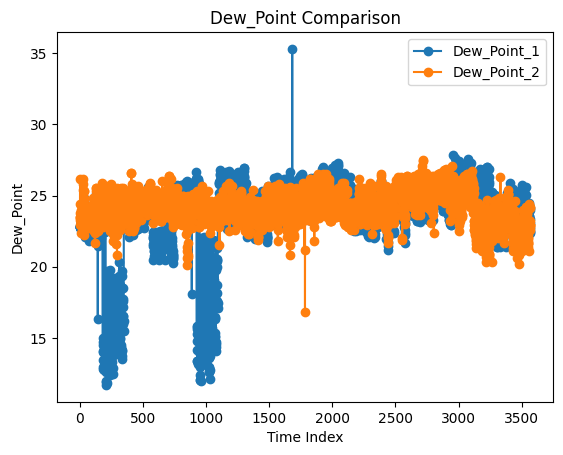

In [17]:
import matplotlib.pyplot as plt

# Membaca data dari file Excel
file_path = 'Dew_Point.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df['Dew_Point_1'], label='Dew_Point_1', marker='o')
plt.plot(df['Dew_Point_2'], label='Dew_Point_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('Dew_Point')
plt.title('Dew_Point Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

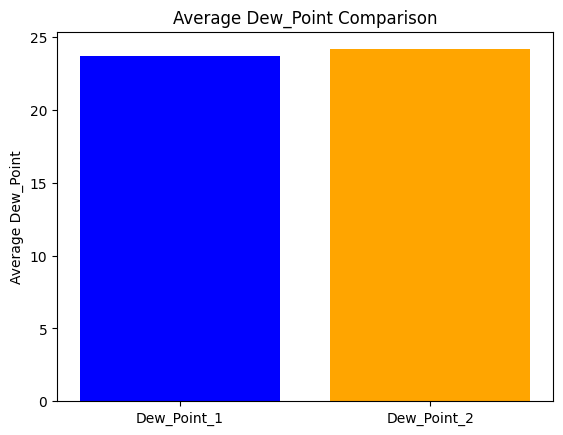

In [18]:
file_path = 'Dew_Point.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Dew_Point_1 dan Dew_Point_2
average_Dew_Point_1 = df['Dew_Point_1'].mean()
average_Dew_Point_2 = df['Dew_Point_2'].mean()

# Plotting
plt.bar(['Dew_Point_1', 'Dew_Point_2'], [average_Dew_Point_1, average_Dew_Point_2], color=['blue', 'orange'])
plt.ylabel('Average Dew_Point')
plt.title('Average Dew_Point Comparison')
plt.show()

In [19]:
df.describe()

,Dew_Point_1,Dew_Point_2
count,3570.000000,3570.000000
mean,23.671104,24.175938
std,2.589558,1.066146
min,11.690000,16.800000
25%,23.120000,23.500000
50%,24.250000,24.200000
75%,25.150000,24.900000
max,35.310000,27.500000


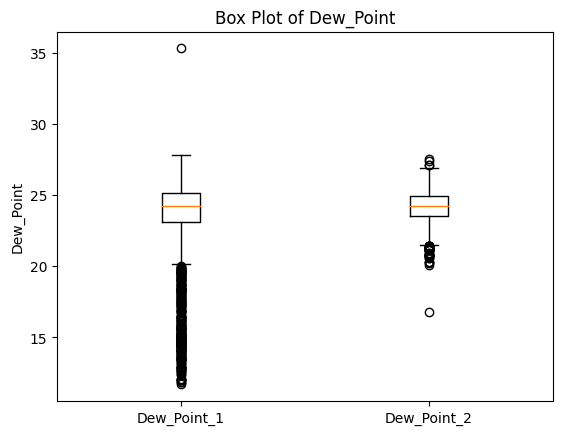

In [20]:
plt.boxplot([df['Dew_Point_1'], df['Dew_Point_2']], labels=['Dew_Point_1', 'Dew_Point_2'])
plt.ylabel('Dew_Point')
plt.title('Box Plot of Dew_Point')
plt.show()

In [21]:
file_path = 'Dew_Point.xlsx'
df = pd.read_excel(file_path)

# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers_Dew_Point_1 = df[(df['Dew_Point_1'] < lower_bound['Dew_Point_1']) | (df['Dew_Point_1'] > upper_bound['Dew_Point_1'])]
outliers_Dew_Point_2 = df[(df['Dew_Point_2'] < lower_bound['Dew_Point_2']) | (df['Dew_Point_2'] > upper_bound['Dew_Point_2'])]

# Menampilkan outlier
print("Outliers in Dew_Point_1:")
print(outliers_Dew_Point_1)

print("\nOutliers in Dew_Point_2:")
print(outliers_Dew_Point_2)

Outliers in Dew_Point_1:
      Dew_Point_1  Dew_Point_2
144         16.35         22.9
182         14.98         23.6
183         14.48         23.2
184         14.06         22.8
185         14.74         23.7
...           ...          ...
1090        18.13         23.8
1091        17.62         23.9
1092        17.11         23.6
1093        17.44         23.4
1683        35.31         24.9

[271 rows x 2 columns]

Outliers in Dew_Point_2:
      Dew_Point_1  Dew_Point_2
296         15.68         20.8
847         26.04         21.1
848         25.73         20.1
849         24.85         20.6
850         24.63         21.4
859         23.46         20.7
860         23.31         20.8
1665        25.71         20.8
1781        25.24         21.2
1784        25.61         16.8
2714        25.04         27.1
2715        24.66         27.5
2716        24.98         27.4
2951        25.99         27.1
3137        24.00         21.3
3183        25.72         21.1
3184        25.57         

In [22]:
# Load the data from the Excel file
file_path = 'Dew_Point.xlsx'
df = pd.read_excel(file_path)

# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers_Dew_Point_1 = df[(df['Dew_Point_1'] < lower_bound['Dew_Point_1']) | (df['Dew_Point_1'] > upper_bound['Dew_Point_1'])]
outliers_Dew_Point_2 = df[(df['Dew_Point_2'] < lower_bound['Dew_Point_2']) | (df['Dew_Point_2'] > upper_bound['Dew_Point_2'])]

# Menghapus nilai yang dianggap sebagai outlier
df_cleaned = df.drop(outliers_Dew_Point_1.index.union(outliers_Dew_Point_2.index))

# Menampilkan DataFrame tanpa outlier
print("DataFrame without outliers:")
print(df_cleaned)

DataFrame without outliers:
      Dew_Point_1  Dew_Point_2
0           22.77         23.4
1           22.78         23.5
2           22.79         23.8
3           22.80         24.4
4           22.81         26.2
...           ...          ...
3565        23.05         22.9
3566        22.73         22.9
3567        22.53         22.8
3568        22.37         22.9
3569        22.45         22.6

[3255 rows x 2 columns]


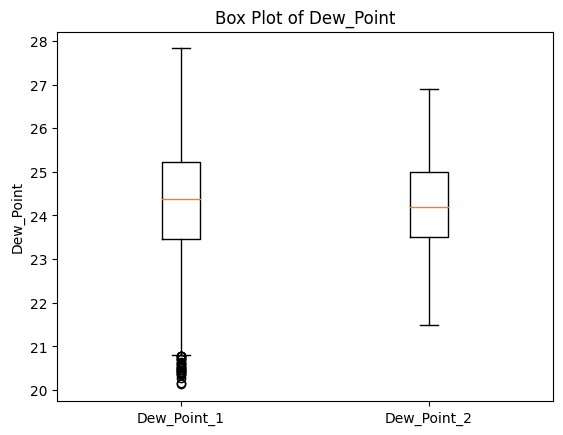

In [23]:
plt.boxplot([df_cleaned['Dew_Point_1'], df_cleaned['Dew_Point_2']], labels=['Dew_Point_1', 'Dew_Point_2'])
plt.ylabel('Dew_Point')
plt.title('Box Plot of Dew_Point')
plt.show()

In [24]:
#pilih kolom yang dituju
manual = df_cleaned['Dew_Point_2']
otomatis = df_cleaned['Dew_Point_1']

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel Dew_Point:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel Dew_Point:
Statistic = -1.6044952083517379, p-value = 0.10865346209323044
Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.


In [25]:
df_cleaned.describe()

,Dew_Point_1,Dew_Point_2
count,3255.000000,3255.000000
mean,24.283166,24.236375
std,1.313613,1.021098
min,20.130000,21.500000
25%,23.450000,23.500000
50%,24.370000,24.200000
75%,25.225000,25.000000
max,27.830000,26.900000


      Dew_Point_1  Dew_Point_2
0           22.77         23.4
1           22.78         23.5
2           22.79         23.8
3           22.80         24.4
4           22.81         26.2
...           ...          ...
3565        23.05         22.9
3566        22.73         22.9
3567        22.53         22.8
3568        22.37         22.9
3569        22.45         22.6

[3570 rows x 2 columns]


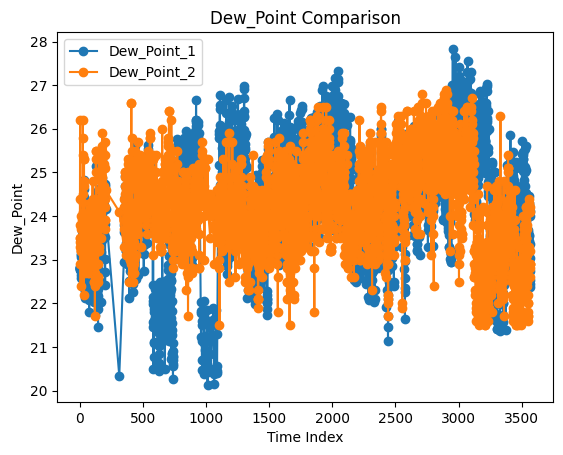

In [26]:
# Membaca data dari file Excel
file_path = 'Dew_Point.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df_cleaned['Dew_Point_1'], label='Dew_Point_1', marker='o')
plt.plot(df_cleaned['Dew_Point_2'], label='Dew_Point_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('Dew_Point')
plt.title('Dew_Point Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

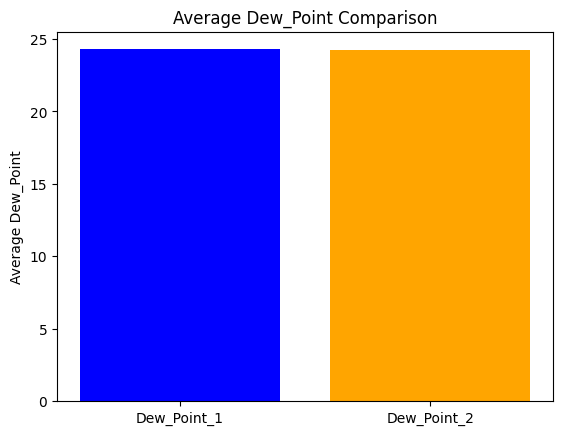

In [27]:
file_path = 'Dew_Point.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Dew_Point_1 dan Dew_Point_2
average_Dew_Point_1 = df_cleaned['Dew_Point_1'].mean()
average_Dew_Point_2 = df_cleaned['Dew_Point_2'].mean()

# Plotting
plt.bar(['Dew_Point_1', 'Dew_Point_2'], [average_Dew_Point_1, average_Dew_Point_2], color=['blue', 'orange'])
plt.ylabel('Average Dew_Point')
plt.title('Average Dew_Point Comparison')
plt.show()

WIND DIRECTION

In [28]:
df = pd.read_excel('Wind_Direction.xlsx')

#pilih kolom yang dituju
manual = df['Wind_Direction_2']
otomatis = df['Wind_Direction_1']

In [29]:
from scipy.stats import ttest_ind

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel Wind_Direction:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel Wind_Direction:
Statistic = -19.220198120714613, p-value = 2.612814506525077e-80
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


      Wind_Direction_1  Wind_Direction_2
0                 27.0                28
1                 26.0                27
2                 26.0                26
3                 26.0                26
4                 26.0                27
...                ...               ...
3565               2.0                32
3566               1.0                27
3567               1.0                26
3568               0.0                24
3569               0.0                15

[3570 rows x 2 columns]


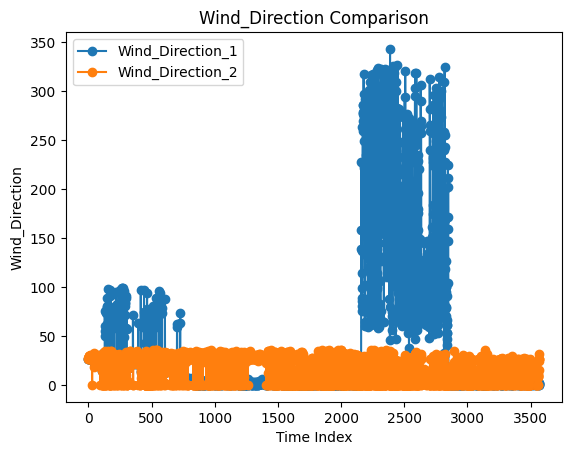

In [30]:
# Membaca data dari file Excel
file_path = 'Wind_Direction.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df['Wind_Direction_1'], label='Wind_Direction_1', marker='o')
plt.plot(df['Wind_Direction_2'], label='Wind_Direction_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('Wind_Direction')
plt.title('Wind_Direction Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

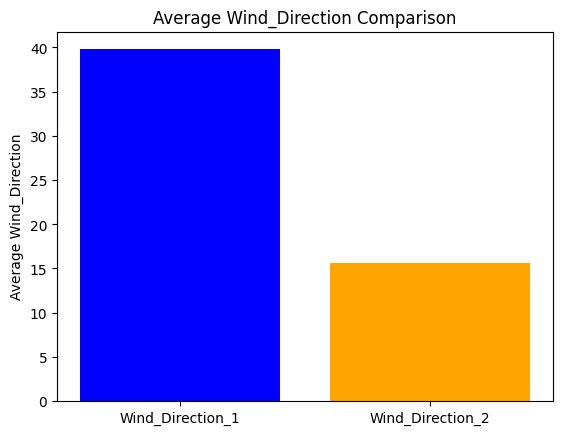

In [31]:
file_path = 'Wind_Direction.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Wind_Direction_1 dan Wind_Direction_2
average_Wind_Direction_1 = df['Wind_Direction_1'].mean()
average_Wind_Direction_2 = df['Wind_Direction_2'].mean()

# Plotting
plt.bar(['Wind_Direction_1', 'Wind_Direction_2'], [average_Wind_Direction_1, average_Wind_Direction_2], color=['blue', 'orange'])
plt.ylabel('Average Wind_Direction')
plt.title('Average Wind_Direction Comparison')
plt.show()

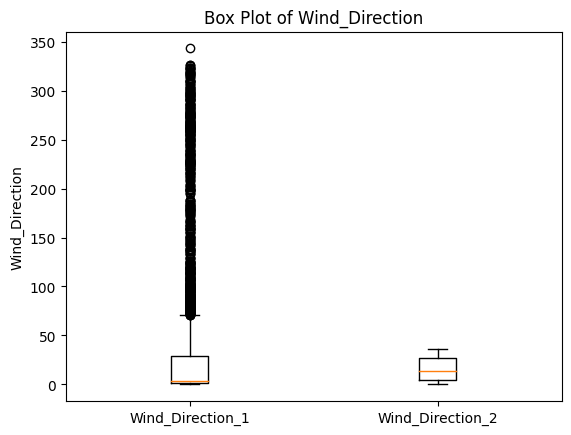

In [32]:
plt.boxplot([df['Wind_Direction_1'], df['Wind_Direction_2']], labels=['Wind_Direction_1', 'Wind_Direction_2'])
plt.ylabel('Wind_Direction')
plt.title('Box Plot of Wind_Direction')
plt.show()

In [33]:
df.describe()

,Wind_Direction_1,Wind_Direction_2
count,3570.000000,3570.000000
mean,39.802471,15.568908
std,74.393072,11.872130
min,0.000000,0.000000
25%,1.000000,4.000000
50%,3.000000,14.000000
75%,29.000000,27.000000
max,343.400000,36.000000


In [77]:
# Load the data from the Excel file
file_path = 'Wind_Direction.xlsx'
df = pd.read_excel(file_path)

# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers_Wind_Direction_1 = df[(df['Wind_Direction_1'] < lower_bound['Wind_Direction_1']) | (df['Wind_Direction_1'] > upper_bound['Wind_Direction_1'])]
outliers_Wind_Direction_2 = df[(df['Wind_Direction_2'] < lower_bound['Wind_Direction_2']) | (df['Wind_Direction_2'] > upper_bound['Wind_Direction_2'])]

# Menghapus nilai yang dianggap sebagai outlier
df_cleaned = df.drop(outliers_Wind_Direction_1.index.union(outliers_Wind_Direction_2.index))

# Menampilkan DataFrame tanpa outlier
print("DataFrame without outliers:")
print(df_cleaned)

DataFrame without outliers:
      Wind_Direction_1  Wind_Direction_2
0                 27.0                28
1                 26.0                27
2                 26.0                26
3                 26.0                26
4                 26.0                27
...                ...               ...
3565               2.0                32
3566               1.0                27
3567               1.0                26
3568               0.0                24
3569               0.0                15

[2912 rows x 2 columns]


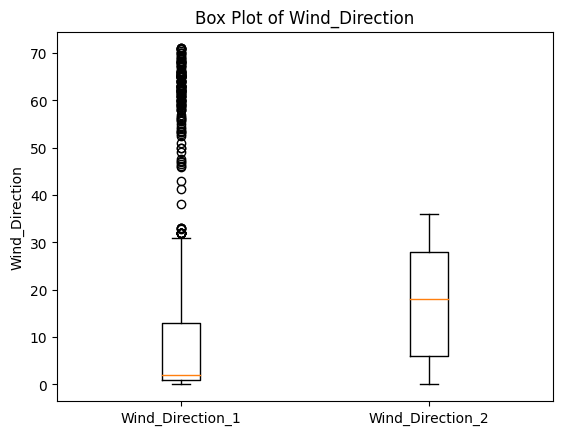

In [78]:
plt.boxplot([df_cleaned['Wind_Direction_1'], df_cleaned['Wind_Direction_2']], labels=['Wind_Direction_1', 'Wind_Direction_2'])
plt.ylabel('Wind_Direction')
plt.title('Box Plot of Wind_Direction')
plt.show()

In [79]:
#pilih kolom yang dituju
manual = df_cleaned['Wind_Direction_2']
otomatis = df_cleaned['Wind_Direction_1']

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel Dew_Point:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel Dew_Point:
Statistic = 20.61982855710741, p-value = 3.100731621135532e-91
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


      Wind_Direction_1  Wind_Direction_2
0                 27.0                28
1                 26.0                27
2                 26.0                26
3                 26.0                26
4                 26.0                27
...                ...               ...
3565               2.0                32
3566               1.0                27
3567               1.0                26
3568               0.0                24
3569               0.0                15

[3570 rows x 2 columns]


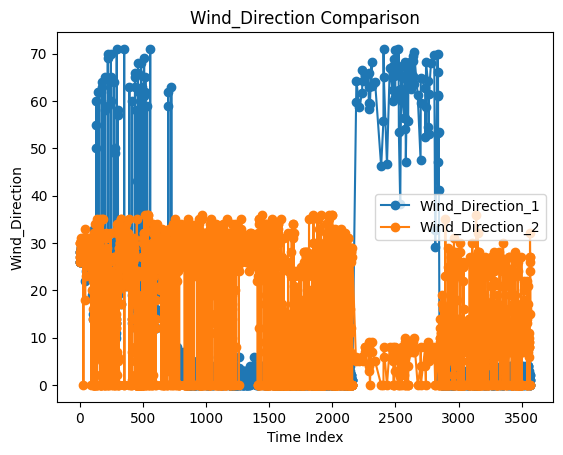

In [80]:
# Membaca data dari file Excel
file_path = 'Wind_Direction.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df_cleaned['Wind_Direction_1'], label='Wind_Direction_1', marker='o')
plt.plot(df_cleaned['Wind_Direction_2'], label='Wind_Direction_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('Wind_Direction')
plt.title('Wind_Direction Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

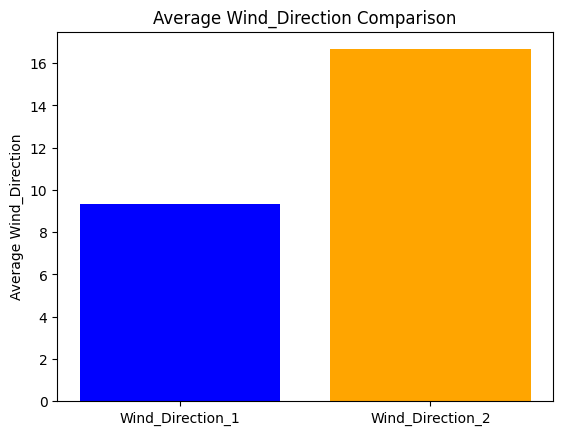

In [81]:
file_path = 'Wind_Direction.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Wind_Direction_1 dan Wind_Direction_2
average_Wind_Direction_1 = df_cleaned['Wind_Direction_1'].mean()
average_Wind_Direction_2 = df_cleaned['Wind_Direction_2'].mean()

# Plotting
plt.bar(['Wind_Direction_1', 'Wind_Direction_2'], [average_Wind_Direction_1, average_Wind_Direction_2], color=['blue', 'orange'])
plt.ylabel('Average Wind_Direction')
plt.title('Average Wind_Direction Comparison')
plt.show()

In [82]:
df_cleaned.describe()

,Wind_Direction_1,Wind_Direction_2
count,2912.000000,2912.000000
mean,9.323726,16.662775
std,15.067712,11.910390
min,0.000000,0.000000
25%,1.000000,6.000000
50%,2.000000,18.000000
75%,13.000000,28.000000
max,71.000000,36.000000


WIND SPEED

In [40]:
df = pd.read_excel('Wind_Speed.xlsx')

#pilih kolom yang dituju
manual = df['Wind_Speed_2']
otomatis = df['Wind_Speed_1']

In [41]:
from scipy.stats import ttest_ind

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel Wind_Speed:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel Wind_Speed:
Statistic = 26.36435263637807, p-value = 2.9513016116491095e-146
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


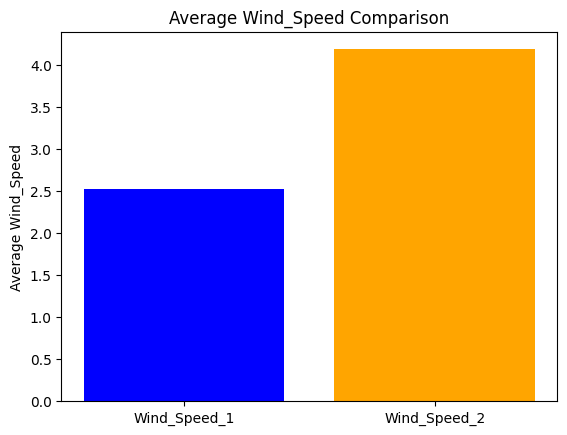

In [42]:
file_path = 'Wind_Speed.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Wind_Speed_1 dan Wind_Speed_2
average_Wind_Speed_1 = df['Wind_Speed_1'].mean()
average_Wind_Speed_2 = df['Wind_Speed_2'].mean()

# Plotting
plt.bar(['Wind_Speed_1', 'Wind_Speed_2'], [average_Wind_Speed_1, average_Wind_Speed_2], color=['blue', 'orange'])
plt.ylabel('Average Wind_Speed')
plt.title('Average Wind_Speed Comparison')
plt.show()

In [43]:
file_path = 'Wind_Speed.xlsx'
df = pd.read_excel(file_path)
df.describe()

,Wind_Speed_1,Wind_Speed_2
count,3570.000000,3570.000000
mean,2.525916,4.187115
std,1.530692,3.439547
min,0.100000,0.000000
25%,1.400000,2.000000
50%,2.200000,4.000000
75%,3.330000,6.000000
max,11.300000,30.000000


      Wind_Speed_1  Wind_Speed_2
0             2.26             4
1             2.53             4
2             4.68            13
3             3.77             9
4             5.55            10
...            ...           ...
3565          2.60             3
3566          1.50             3
3567          1.80             3
3568          1.00             2
3569          0.70             1

[3570 rows x 2 columns]


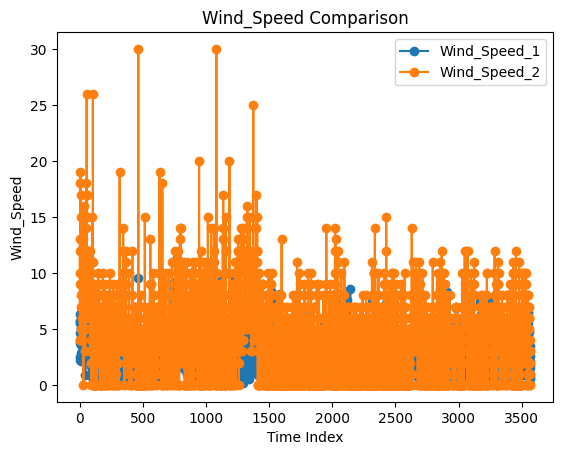

In [44]:
# Membaca data dari file Excel
file_path = 'Wind_Speed.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df['Wind_Speed_1'], label='Wind_Speed_1', marker='o')
plt.plot(df['Wind_Speed_2'], label='Wind_Speed_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('Wind_Speed')
plt.title('Wind_Speed Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

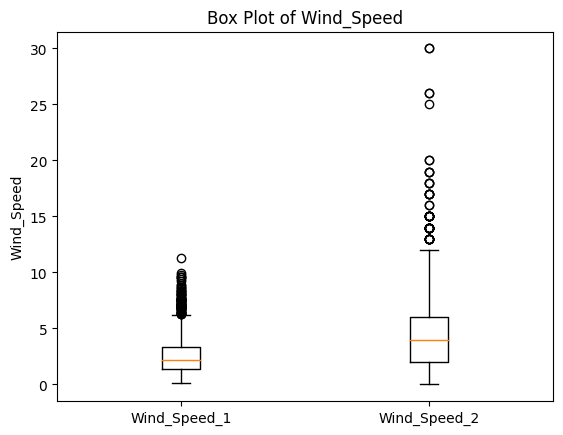

In [45]:
plt.boxplot([df['Wind_Speed_1'], df['Wind_Speed_2']], labels=['Wind_Speed_1', 'Wind_Speed_2'])
plt.ylabel('Wind_Speed')
plt.title('Box Plot of Wind_Speed')
plt.show()

In [46]:
# Load the data from the Excel file
file_path = 'Wind_Speed.xlsx'
df = pd.read_excel(file_path)

# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers_Wind_Speed_1 = df[(df['Wind_Speed_1'] < lower_bound['Wind_Speed_1']) | (df['Wind_Speed_1'] > upper_bound['Wind_Speed_1'])]
outliers_Wind_Speed_2 = df[(df['Wind_Speed_2'] < lower_bound['Wind_Speed_2']) | (df['Wind_Speed_2'] > upper_bound['Wind_Speed_2'])]

# Menghapus nilai yang dianggap sebagai outlier
df_cleaned = df.drop(outliers_Wind_Speed_1.index.union(outliers_Wind_Speed_2.index))

# Menampilkan DataFrame tanpa outlier
print("DataFrame without outliers:")
print(df_cleaned)

DataFrame without outliers:
      Wind_Speed_1  Wind_Speed_2
0             2.26             4
1             2.53             4
3             3.77             9
4             5.55            10
9             4.18            12
...            ...           ...
3565          2.60             3
3566          1.50             3
3567          1.80             3
3568          1.00             2
3569          0.70             1

[3439 rows x 2 columns]


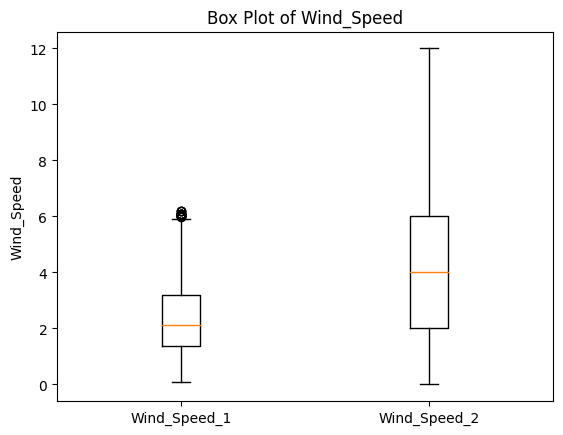

In [47]:
plt.boxplot([df_cleaned['Wind_Speed_1'], df_cleaned['Wind_Speed_2']], labels=['Wind_Speed_1', 'Wind_Speed_2'])
plt.ylabel('Wind_Speed')
plt.title('Box Plot of Wind_Speed')
plt.show()

In [48]:
#pilih kolom yang dituju
manual = df_cleaned['Wind_Speed_2']
otomatis = df_cleaned['Wind_Speed_1']

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel Wind_Speed:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel Wind_Speed:
Statistic = 27.760397468503882, p-value = 7.408127109250335e-161
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


      Wind_Speed_1  Wind_Speed_2
0             2.26             4
1             2.53             4
2             4.68            13
3             3.77             9
4             5.55            10
...            ...           ...
3565          2.60             3
3566          1.50             3
3567          1.80             3
3568          1.00             2
3569          0.70             1

[3570 rows x 2 columns]


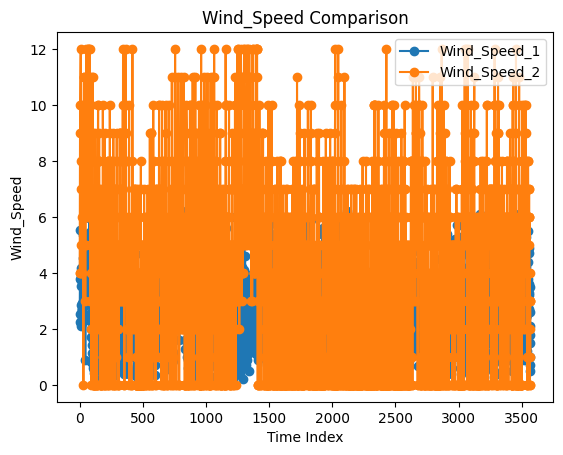

In [49]:
# Membaca data dari file Excel
file_path = 'Wind_Speed.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df_cleaned['Wind_Speed_1'], label='Wind_Speed_1', marker='o')
plt.plot(df_cleaned['Wind_Speed_2'], label='Wind_Speed_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('Wind_Speed')
plt.title('Wind_Speed Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

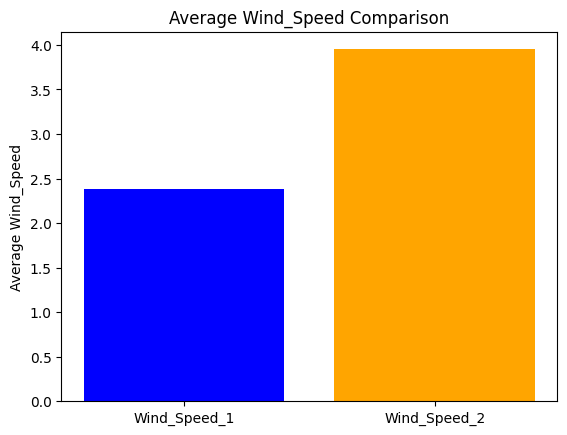

In [50]:
file_path = 'Wind_Speed.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Wind_Speed_1 dan Wind_Speed_2
average_Wind_Speed_1 = df_cleaned['Wind_Speed_1'].mean()
average_Wind_Speed_2 = df_cleaned['Wind_Speed_2'].mean()

# Plotting
plt.bar(['Wind_Speed_1', 'Wind_Speed_2'], [average_Wind_Speed_1, average_Wind_Speed_2], color=['blue', 'orange'])
plt.ylabel('Average Wind_Speed')
plt.title('Average Wind_Speed Comparison')
plt.show()

In [51]:
df_cleaned.describe()

,Wind_Speed_1,Wind_Speed_2
count,3439.000000,3439.000000
mean,2.381778,3.952893
std,1.309148,3.049827
min,0.100000,0.000000
25%,1.380000,2.000000
50%,2.120000,4.000000
75%,3.200000,6.000000
max,6.200000,12.000000


QFE

In [52]:
df = pd.read_excel('QFE.xlsx')

#pilih kolom yang dituju
manual = df['QFE_2 ']
otomatis = df['QFE_1']

In [53]:
from scipy.stats import ttest_ind

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel QFE:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel QFE:
Statistic = 2.3453742622872236, p-value = 0.0190352220660514
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


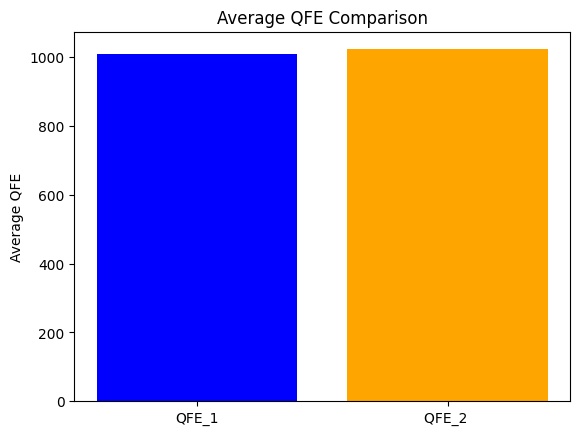

In [54]:
file_path = 'QFE.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom QFE_1 dan QFE_2
average_QFE_1 = df['QFE_1'].mean()
average_QFE_2 = df['QFE_2 '].mean()

# Plotting
plt.bar(['QFE_1', 'QFE_2 '], [average_QFE_1, average_QFE_2], color=['blue', 'orange'])
plt.ylabel('Average QFE')
plt.title('Average QFE Comparison')
plt.show()

        QFE_1  QFE_2 
0     1011.02  1010.7
1     1011.52  1011.2
2     1011.61  1011.2
3     1011.37  1011.1
4     1010.48  1010.2
...       ...     ...
3565  1010.36  1009.8
3566  1010.32  1009.8
3567  1010.92  1010.0
3568  1011.52  1010.7
3569  1011.82  1011.1

[3570 rows x 2 columns]


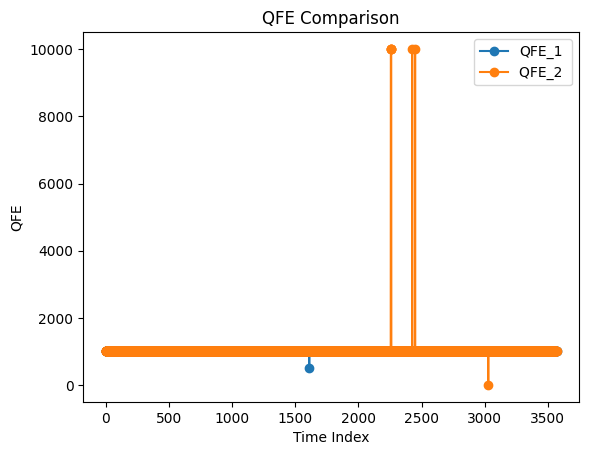

In [55]:
# Membaca data dari file Excel
file_path = 'QFE.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df['QFE_1'], label='QFE_1', marker='o')
plt.plot(df['QFE_2 '], label='QFE_2 ', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('QFE')
plt.title('QFE Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

In [56]:
df.describe()

,QFE_1,QFE_2
count,3570.000000,3570.000000
mean,1008.843464,1023.339961
std,8.670311,369.203073
min,505.910000,0.600000
25%,1007.520000,1007.200000
50%,1009.010000,1008.600000
75%,1010.370000,1009.900000
max,1014.720000,10011.500000


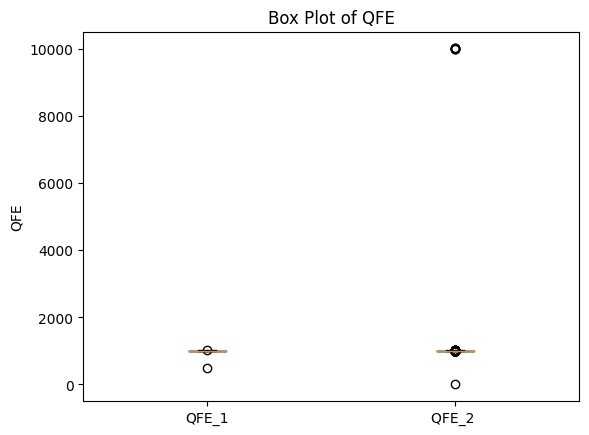

In [57]:
plt.boxplot([df['QFE_1'], df['QFE_2 ']], labels=['QFE_1', 'QFE_2 '])
plt.ylabel('QFE')
plt.title('Box Plot of QFE')
plt.show()

In [58]:
# Load the data from the Excel file
file_path = 'QFE.xlsx'
df = pd.read_excel(file_path)

# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers_Wind_Speed_1 = df[(df['QFE_1'] < lower_bound['QFE_1']) | (df['QFE_1'] > upper_bound['QFE_1'])]
outliers_Wind_Speed_2 = df[(df['QFE_2 '] < lower_bound['QFE_2 ']) | (df['QFE_2 '] > upper_bound['QFE_2 '])]

# Menghapus nilai yang dianggap sebagai outlier
df_cleaned = df.drop(outliers_Wind_Speed_1.index.union(outliers_Wind_Speed_2.index))

# Menampilkan DataFrame tanpa outlier
print("DataFrame without outliers:")
print(df_cleaned)

DataFrame without outliers:
        QFE_1  QFE_2 
0     1011.02  1010.7
1     1011.52  1011.2
2     1011.61  1011.2
3     1011.37  1011.1
4     1010.48  1010.2
...       ...     ...
3565  1010.36  1009.8
3566  1010.32  1009.8
3567  1010.92  1010.0
3568  1011.52  1010.7
3569  1011.82  1011.1

[3465 rows x 2 columns]


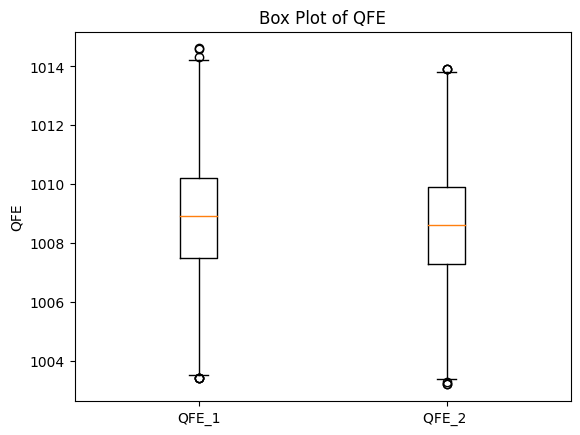

In [59]:
plt.boxplot([df_cleaned['QFE_1'], df_cleaned['QFE_2 ']], labels=['QFE_1', 'QFE_2 '])
plt.ylabel('QFE')
plt.title('Box Plot of QFE')
plt.show()

In [60]:
#pilih kolom yang dituju
manual = df_cleaned['QFE_2 ']
otomatis = df_cleaned['QFE_1']

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel QFE:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel QFE:
Statistic = -5.150276244659061, p-value = 2.6727709840101415e-07
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


        QFE_1  QFE_2 
0     1011.02  1010.7
1     1011.52  1011.2
2     1011.61  1011.2
3     1011.37  1011.1
4     1010.48  1010.2
...       ...     ...
3565  1010.36  1009.8
3566  1010.32  1009.8
3567  1010.92  1010.0
3568  1011.52  1010.7
3569  1011.82  1011.1

[3570 rows x 2 columns]


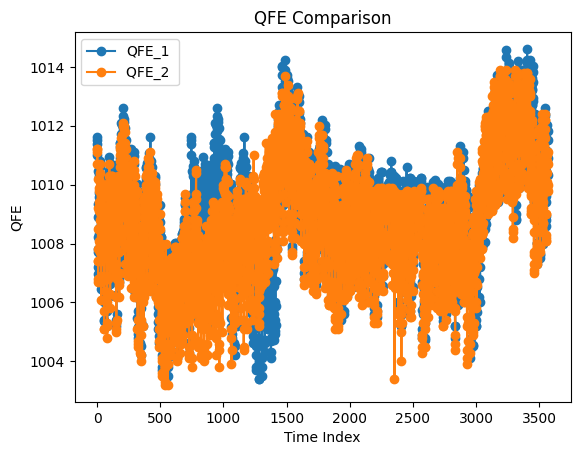

In [61]:
# Membaca data dari file Excel
file_path = 'QFE.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df_cleaned['QFE_1'], label='QFE_1', marker='o')
plt.plot(df_cleaned['QFE_2 '], label='QFE_2 ', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('QFE')
plt.title('QFE Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

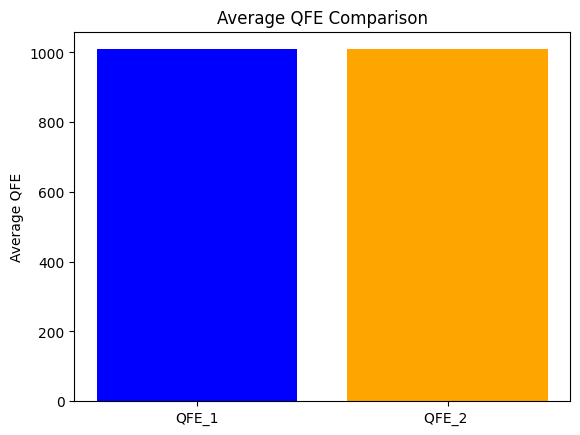

In [62]:
file_path = 'QFE.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom QFE_1 dan QFE_2
average_QFE_1 = df_cleaned['QFE_1'].mean()
average_QFE_2 = df_cleaned['QFE_2 '].mean()

# Plotting
plt.bar(['QFE_1', 'QFE_2 '], [average_QFE_1, average_QFE_2], color=['blue', 'orange'])
plt.ylabel('Average QFE')
plt.title('Average QFE Comparison')
plt.show()

In [63]:
df_cleaned.describe()

,QFE_1,QFE_2
count,3465.000000,3465.000000
mean,1008.915390,1008.664387
std,2.051132,2.005705
min,1003.410000,1003.200000
25%,1007.510000,1007.300000
50%,1008.920000,1008.600000
75%,1010.220000,1009.900000
max,1014.610000,1013.900000


QFF

In [64]:
df = pd.read_excel('QFF.xlsx')

#pilih kolom yang dituju
manual = df['QFF_2']
otomatis = df['QFF_1']

In [65]:
from scipy.stats import ttest_ind

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel QFF:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel QFF:
Statistic = -1.983231594819969, p-value = 0.047379826505394844
Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.


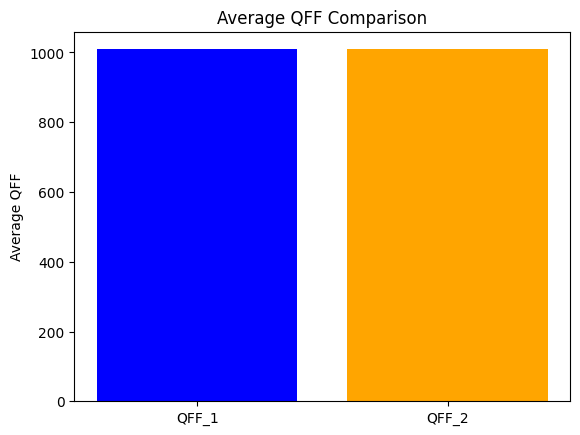

In [66]:
file_path = 'QFF.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Temperature_1 dan Temperature_2
average_QFF_1 = df['QFF_1'].mean()
average_QFF_2 = df['QFF_2'].mean()

# Plotting
plt.bar(['QFF_1', 'QFF_2'], [average_QFF_1, average_QFF_2], color=['blue', 'orange'])
plt.ylabel('Average QFF')
plt.title('Average QFF Comparison')
plt.show()

        QFF_1   QFF_2
0     1011.36  1011.4
1     1011.86  1011.9
2     1011.95  1011.9
3     1011.71  1011.8
4     1010.82  1010.9
...       ...     ...
3565  1010.70  1010.4
3566  1010.66  1010.4
3567  1011.26  1010.7
3568  1011.86  1011.4
3569  1012.16  1011.8

[3570 rows x 2 columns]


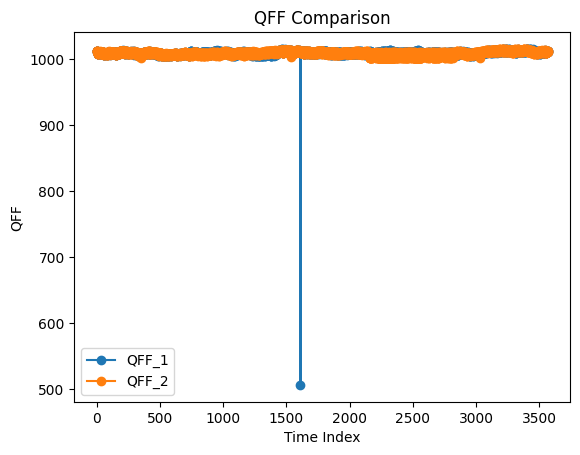

In [67]:
# Membaca data dari file Excel
file_path = 'QFF.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df['QFF_1'], label='QFF_1', marker='o')
plt.plot(df['QFF_2'], label='QFF_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('QFF')
plt.title('QFF Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()

In [68]:
file_path = 'QFF.xlsx'
df = pd.read_excel(file_path)
df.describe()

,QFF_1,QFF_2
count,3570.000000,3570.000000
mean,1009.183511,1008.881616
std,8.673229,2.738503
min,506.080000,1001.000000
25%,1007.860000,1007.700000
50%,1009.350000,1009.100000
75%,1010.710000,1010.600000
max,1015.060000,1015.200000


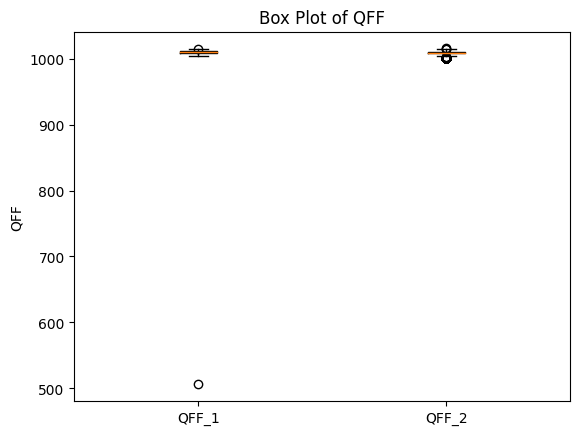

In [69]:
plt.boxplot([df['QFF_1'], df['QFF_2']], labels=['QFF_1', 'QFF_2'])
plt.ylabel('QFF')
plt.title('Box Plot of QFF')
plt.show()

In [70]:
# Load the data from the Excel file
file_path = 'QFF.xlsx'
df = pd.read_excel(file_path)

# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers_QFF_1 = df[(df['QFF_1'] < lower_bound['QFF_1']) | (df['QFF_1'] > upper_bound['QFF_1'])]
outliers_QFF_2 = df[(df['QFF_2'] < lower_bound['QFF_2']) | (df['QFF_2'] > upper_bound['QFF_2'])]

# Menghapus nilai yang dianggap sebagai outlier
df_cleaned = df.drop(outliers_QFF_1.index.union(outliers_QFF_2.index))

# Menampilkan DataFrame tanpa outlier
print("DataFrame without outliers:")
print(df_cleaned)

DataFrame without outliers:
        QFF_1   QFF_2
0     1011.36  1011.4
1     1011.86  1011.9
2     1011.95  1011.9
3     1011.71  1011.8
4     1010.82  1010.9
...       ...     ...
3565  1010.70  1010.4
3566  1010.66  1010.4
3567  1011.26  1010.7
3568  1011.86  1011.4
3569  1012.16  1011.8

[3367 rows x 2 columns]


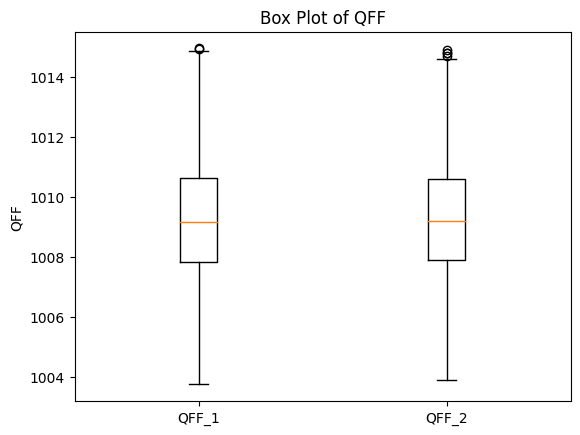

In [71]:
plt.boxplot([df_cleaned['QFF_1'], df_cleaned['QFF_2']], labels=['QFF_1', 'QFF_2'])
plt.ylabel('QFF')
plt.title('Box Plot of QFF')
plt.show()

In [72]:
df_cleaned.describe()

,QFF_1,QFF_2
count,3367.000000,3367.000000
mean,1009.233150,1009.330680
std,2.082257,2.035889
min,1003.740000,1003.900000
25%,1007.810000,1007.900000
50%,1009.165000,1009.200000
75%,1010.635000,1010.600000
max,1014.950000,1014.900000


In [73]:
#pilih kolom yang dituju
manual = df_cleaned['QFF_2']
otomatis = df_cleaned['QFF_1']

# Melakukan uji t independen
hasil_uji_t, p_value = ttest_ind(manual, otomatis)

# Menampilkan hasil uji
print("Hasil Uji t Variabel QFF:")
print(f"Statistic = {hasil_uji_t}, p-value = {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Melakukan pengujian hipotesis
if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.")

Hasil Uji t Variabel QFF:
Statistic = 1.9433342518845678, p-value = 0.052017410483513
Terima hipotesis nol: Tidak ada perbedaan signifikan antara dua kelompok.


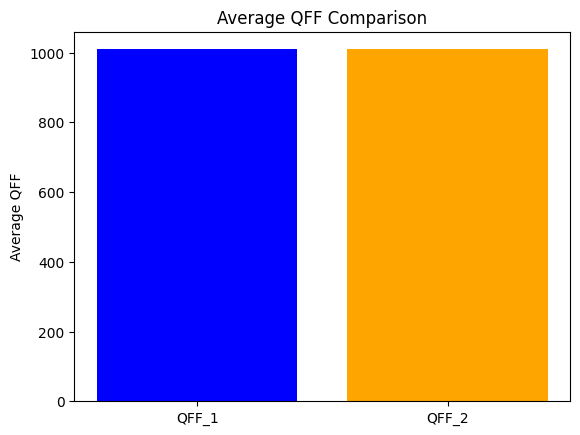

In [74]:
file_path = 'QFF.xlsx'
df = pd.read_excel(file_path)

# Menghitung rata-rata nilai kolom Temperature_1 dan Temperature_2
average_QFF_1 = df_cleaned['QFF_1'].mean()
average_QFF_2 = df_cleaned['QFF_2'].mean()

# Plotting
plt.bar(['QFF_1', 'QFF_2'], [average_QFF_1, average_QFF_2], color=['blue', 'orange'])
plt.ylabel('Average QFF')
plt.title('Average QFF Comparison')
plt.show()

        QFF_1   QFF_2
0     1011.36  1011.4
1     1011.86  1011.9
2     1011.95  1011.9
3     1011.71  1011.8
4     1010.82  1010.9
...       ...     ...
3565  1010.70  1010.4
3566  1010.66  1010.4
3567  1011.26  1010.7
3568  1011.86  1011.4
3569  1012.16  1011.8

[3570 rows x 2 columns]


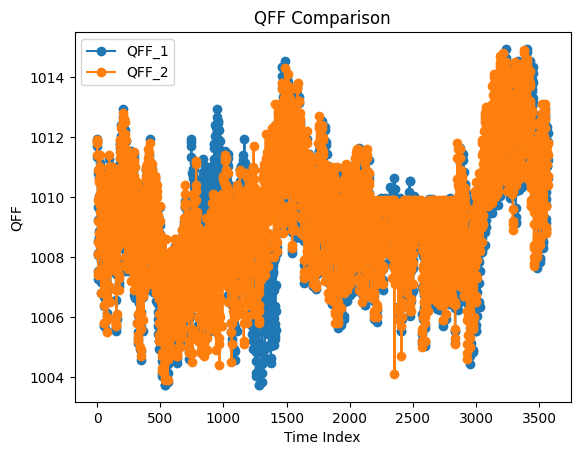

In [75]:
# Membaca data dari file Excel
file_path = 'QFF.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data
print(df)

# Plotting
plt.plot(df_cleaned['QFF_1'], label='QFF_1', marker='o')
plt.plot(df_cleaned['QFF_2'], label='QFF_2', marker='o')

# Menambahkan label dan judul
plt.xlabel('Time Index')
plt.ylabel('QFF')
plt.title('QFF Comparison')
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()